# Imports



In [217]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import fixed
from geopy.geocoders import Nominatim
from numba import cuda
import numba
from tqdm import tqdm 


geolocator = Nominatim(user_agent="geoapiAula_04")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Entrada de dados

In [218]:
df = pd.read_csv('datasets/kc_house_data.csv')

## 1. Qual a quantide imóveis por nível?
    - Nivel 0: preço entre R$ 0.00 e R$ 321.950
    - Nivel 1: preço entre R$ 321.950 e R$ 450.000
    - Nivel 2: preço entre R$ 450.000 e R$ 645.000
    - Nivel 3: preço acima de  R$ 645.000

In [219]:

df['level'] = df['price'].apply( lambda x:0 if x< 321950 else
                                          1 if( x > 321950) & ( x < 450000) else
                                          2 if( x > 450000) & ( x < 645000) else 3)
for i in range(len(df)):
    if (df.loc[i, 'price'] > 0) & (df.loc[i, 'price'] < 321950):
        df.loc[i, 'level'] = 'nivel_0'
    elif (df.loc[i, 'price'] > 321950) & (df.loc[i, 'price'] < 450000):  
        df.loc[i, 'level'] = 'nivel_1'
    elif (df.loc[i, 'price'] > 450000) & (df.loc[i, 'price'] < 645000):    
        df.loc[i,'level'] = 'nivel_2'
    else:
        df.loc[i, 'level'] = 'nivel_3'

In [220]:
print('O nível 0  têm {}'.format(df[df['level'] == 'nivel_0'].shape[0]))
print('O nível 1  têm {}'.format(df[df['level'] == 'nivel_1'].shape[0]))
print('O nível 2  têm {}'.format(df[df['level'] == 'nivel_2'].shape[0]))
print('O nível 3  têm {}'.format(df[df['level'] == 'nivel_3'].shape[0]))

O nível 0  têm 5403
O nível 1  têm 5288
O nível 2  têm 5336
O nível 3  têm 5586


## 2. Adicione as seguintes informações ao imóvel:
    - O nome da Rua
    - O número do imóvel
    - O nome do Bairro
    - O nome da Cidade
    - O nome do Estado
    
    
    
#### - Onde tem essas informações?
    - Tem no banco de dados da empresa?
    - Tem essas informações que são fornecidas por uma API.
    - Dentro de um arquivo na pasta do meu colega de colega, chamado Legilson
    
#### - Qual dado eu tenho na minha base que eu consiga fazer link
#### - Como coletar esse dados e como anexá-lo no conjunto de dados originais.

In [9]:
################## Pra economizar tempo, eu fiz junto com o outro exercicio
# # Create empty rows
# df['road'] = 'na'
# df['house_number'] = 'na'
# df['city'] = 'na'
# df['Country'] = 'na'
# df['state'] = 'na'


# geolocator = Nominatim(user_agent="geoapiAula_04")

# for i in range(len(df)):
#     print('Loop: {} / {}'.format(i, len(df)))
#     # make query
#     query = str(df.loc[i, 'lat'])+ ',' + str(df.loc[i,'long'])
    
#     # API Request 
#     response = geolocator.reverse(query)
    
#     # Populate df
#     if 'house_number' in response.raw['address']:
#         df.loc[i, 'house_number'] = response.raw['address']['house_number']
#     if 'road' in response.raw['address']:
#         df.loc[i, 'road'] = response.raw['address']['road']
#     if 'neighbourhood' in response.raw['address']:
#         df.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#     if 'city' in response.raw['address']:
#         df.loc[i, 'city'] = response.raw['address']['city']
#     if 'county' in response.raw['address']:
#         df.loc[i, 'county'] = response.raw['address']['county']
#     if 'state' in response.raw['address']:
#         df.loc[i, 'state'] = response.raw['address']['state']
    

In [6]:
df['level'].head()

0    nivel_0
1    nivel_2
2    nivel_0
3    nivel_2
4    nivel_2
Name: level, dtype: object

In [11]:
df1 = df.copy()

In [15]:
# df3.to_csv('file.csv')
df1.to_csv('df1.csv', index=False)

# Filtro iterativos no map


In [221]:
houses = df[['id', 'lat','long','price']].copy()


# define level
for i in range(len(houses)):
    if houses.loc[i,'price'] <= 321950:
        houses.loc[i,'level'] = 0
    elif (houses.loc[i,'price'] > 321950) & (houses.loc[i, 'price'] <= 450000):
        houses.loc[i,'level'] = 1
    elif (houses.loc[i,'price'] > 450000) & (houses.loc[i, 'price'] <= 645000):
        houses.loc[i,'level'] = 2
    else:
        houses.loc[i,'level'] = 3
          
houses['level'] = houses['level'].astype(int)
          
fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       color='level',
                       size='price',
                       #color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':0})
fig.show()          

# Adicionando filtros iterativos

In [222]:
import ipywidgets as widgets

df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x ==1  else 'no')

df['level'] =df['price'].apply(lambda x: 0 if x < 321950 else
                                         1 if (x > 321950) & (x < 450000) else
                                         2 if (x > 450000) & (x < 645000) else 3 )


df['level'] = df['level'].astype(int)
style = {'description_width': 'initial'}

# Iterative buttons
price_limit = widgets.IntSlider(
    value = 540000,
    min = 75000,
    max = 77000000,
    step = 1,
    description='Maximum Price',
    disable=False,
    style = style)


waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'yes',
    description='Water View',
    disable=False)

def update_map(df, waterfront, limit):
    houses = df[(df['price'] <= limit) &
               (df['is_waterfront'] == waterfront)][['id','lat','long','price','level']]
    
    fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       color='level',
                       size='price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':0})
    fig.show()  

In [223]:
widgets.interactive( update_map,df=fixed(df), waterfront=waterfront_bar, limit=price_limit)

interactive(children=(Dropdown(description='Water View', index=1, options=('no', 'yes'), value='yes'), IntSlid…

# Iteratividade como dashboard

In [224]:
import ipywidgets as widgets
from matplotlib import gridspec
from matplotlib import pyplot as plt

In [225]:
# change date format
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')

# widgets to control data
date_limit = widgets.SelectionSlider(
    options=df['date'].sort_values().unique().tolist(),
    value = '2014-12-01',
    description = 'Disponível',
    continuous_update=False,
    orientation='horizontal',
    readout=True )
    
def update_map(df, limit):
    # filter df
    df = df[df['date'] >= limit].copy()

    fig = plt.figure(figsize=(21,12))
    specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)                 

    ax1 = fig.add_subplot(specs[0,:])  # firts rows               
    ax2 = fig.add_subplot(specs[1,0])  # second row and first column
    ax3 = fig.add_subplot(specs[1,1])  # second row second column 


    by_year = df[['id', 'year']].groupby('year').sum().reset_index()
    ax1.bar(by_year['year'], by_year['id'])

    by_day = df[['id', 'date']].groupby('date').mean().reset_index()
    ax2.plot(by_day['date'], by_day['id'])
    ax2.set_title('Title: Avg Price by Day') 
    plt.xticks(rotation=60);

    by_week_of_year= df[['id', 'year_week']].groupby('year_week').mean().reset_index()
    ax3.bar(by_week_of_year['year_week'], by_week_of_year['id'])                 
    ax3.set_title('title: Avg Price by Week Of Year')                                 
                     


In [226]:
widgets.interactive(update_map, df=fixed(df), limit=date_limit)

interactive(children=(SelectionSlider(continuous_update=False, description='Disponível', index=212, options=('…

# Novas perguntas de negócio

## 1. Qual a quantide imóveis por nível?
    - Nivel 0: preço entre R$ 0.00 e R$ 321.950
    - Nivel 1: preço entre R$ 321.950 e R$ 450.000
    - Nivel 2: preço entre R$ 450.000 e R$ 645.000
    - Nivel 3: preço acima de  R$ 645.000

In [227]:
df['level'] =df['price'].apply(lambda x: 'nivel_0' if x < 321950 else
                                         'nivel_1' if (x > 321950) & (x < 450000) else
                                         'nivel_2' if (x > 450000) & (x < 645000) else 'nivel_3' )

In [228]:
print('O nível 0  têm {}'.format(df[df['level'] == 'nivel_0'].shape[0]))
print('O nível 1  têm {}'.format(df[df['level'] == 'nivel_1'].shape[0]))
print('O nível 2  têm {}'.format(df[df['level'] == 'nivel_2'].shape[0]))
print('O nível 3  têm {}'.format(df[df['level'] == 'nivel_3'].shape[0]))

O nível 0  têm 5403
O nível 1  têm 5288
O nível 2  têm 5336
O nível 3  têm 5586


## 2. Adicione as seguintes informações ao imóvel:
 - Nome da Rua
 - Número do imóvel
 - O nome do Bairro
 - O nome da cidade
 - O nome do estado

In [33]:
# Create empty rows
@cuda.jit
def update_dataset(df):
    df['road'] = 'na'
    df['house_number'] = 'na'
    df['city'] = 'na'
    df['Country'] = 'na'
    df['state'] = 'na'


    geolocator = Nominatim(user_agent="geoapiAula_04")

    for i in range(len(df)):
        print('Loop: {} / {}'.format(i, len(df)))
        # make query
        query = str(df.loc[i, 'lat'])+ ',' + str(df.loc[i,'long'])

        # API Request 
        response = geolocator.reverse(query)

        # Populate df
        if 'house_number' in response.raw['address']:
            df.loc[i, 'house_number'] = response.raw['address']['house_number']
        if 'road' in response.raw['address']:
            df.loc[i, 'road'] = response.raw['address']['road']
        if 'neighbourhood' in response.raw['address']:
            df.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
        if 'city' in response.raw['address']:
            df.loc[i, 'city'] = response.raw['address']['city']
        if 'county' in response.raw['address']:
            df.loc[i, 'county'] = response.raw['address']['county']
        if 'state' in response.raw['address']:
            df.loc[i, 'state'] = response.raw['address']['state']
    return df


In [34]:
update_dataset(df)

ValueError: 
Kernel launch configuration was not specified. Use the syntax:

kernel_function[blockspergrid, threadsperblock](arg0, arg1, ..., argn)

See https://numba.pydata.org/numba-doc/latest/cuda/kernels.html#kernel-invocation for help.



## 3. Adicione o nível do imóvel no mapa como uma cor

In [229]:
houses = df[['id', 'lat','long','price']].copy()


# define level
for i in range(len(houses)):
    if houses.loc[i,'price'] <= 321950:
        houses.loc[i,'level'] = 0
    elif (houses.loc[i,'price'] > 321950) & (houses.loc[i, 'price'] <= 450000):
        houses.loc[i,'level'] = 1
    elif (houses.loc[i,'price'] > 450000) & (houses.loc[i, 'price'] <= 645000):
        houses.loc[i,'level'] = 2
    else:
        houses.loc[i,'level'] = 3
          
houses['level'] = houses['level'].astype(int)
          
fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       color='level',
                       size='level',
                       #color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':0})
fig.show()          

## 4. Adicione o preço do imóvel como o tamanho do ponto no mapa

In [230]:
import plotly.express as px

houses = df[['id', 'lat','long','price']]

fig = px.scatter_mapbox(houses,
                       lat = 'lat',
                       lon = 'long',
                       size= 'price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':2})
fig.show()     

## 5. Adicione opções de filtros para fazer as próprias análises
  - Eu quero escolher visualizar imóveis com vista para água ou não
  - Eu quero escolher visualizar imóveis até um certo valor de preço

In [231]:
df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x ==1  else 'no')

df['level'] =df['price'].apply(lambda x: 0 if x < 321950 else
                                         1 if (x > 321950) & (x < 450000) else
                                         2 if (x > 450000) & (x < 645000) else 3 )


df['level'] = df['level'].astype(int)
style = {'description_width': 'initial'}

# Iterative slider
price_limit = widgets.IntSlider(
    value = 540000,
    min = 75000,
    max = 77000000,
    step = 1,
    description='Maximum Price',
    disable=False,
    style = style)


# Iterative dropdown
waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'yes',
    description='Water View',
    disable=False)


# # Iterative loading
# loading = widgets.IntProgress(
#     value=7,
#     min=0,
#     max=10,
#     step=1,
#     description='Loading:',
#     bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
#     orientation='horizontal'
# )

def update_map(df, waterfront, limit):
    houses = df[(df['price'] <= limit) &
               (df['is_waterfront'] == waterfront)][['id','lat','long','price','level']]
    
    fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       color='price',
                       size='price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':0})
    fig.show()  

In [232]:
widgets.interactive( update_map,df=fixed(df), waterfront=waterfront_bar, limit=price_limit)

interactive(children=(Dropdown(description='Water View', index=1, options=('no', 'yes'), value='yes'), IntSlid…

##   6. Adicionar opções de filtros no últimos dashboard enviado:
   - Visualizar somente valores a partir de uma data disponível para compra

In [233]:
# change date format
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')

# widgets to control data
date_limit = widgets.SelectionSlider(
    options=df['date'].sort_values().unique().tolist(),
    value = '2014-12-01',
    description = 'Disponível',
    continuous_update=True,
    orientation='horizontal',
    readout=True )
    
def update_map(df, limit):
    # filter df
    df = df[df['date'] >= limit].copy()

    fig = plt.figure(figsize=(21,12))
    specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)                 

    ax1 = fig.add_subplot(specs[0,:])  # firts rows               
    ax2 = fig.add_subplot(specs[1,0])  # second row and first column
    ax3 = fig.add_subplot(specs[1,1])  # second row second column 


    by_year = df[['id', 'year']].groupby('year').sum().reset_index()
    ax1.bar(by_year['year'], by_year['id'])

    by_day = df[['id', 'date']].groupby('date').mean().reset_index()
    ax2.plot(by_day['date'], by_day['id'])
    ax2.set_title('Title: Avg Price by Day')
    plt.xticks(rotation=60);

    by_week_of_year= df[['id', 'year_week']].groupby('year_week').mean().reset_index()
    ax3.bar(by_week_of_year['year_week'], by_week_of_year['id']).astype(int)                 
    ax3.set_title('title: Avg Price by Week Of Year')                                 
                     


interactive(children=(SelectionSlider(description='Disponível', index=212, options=('2014-05-02', '2014-05-03'…

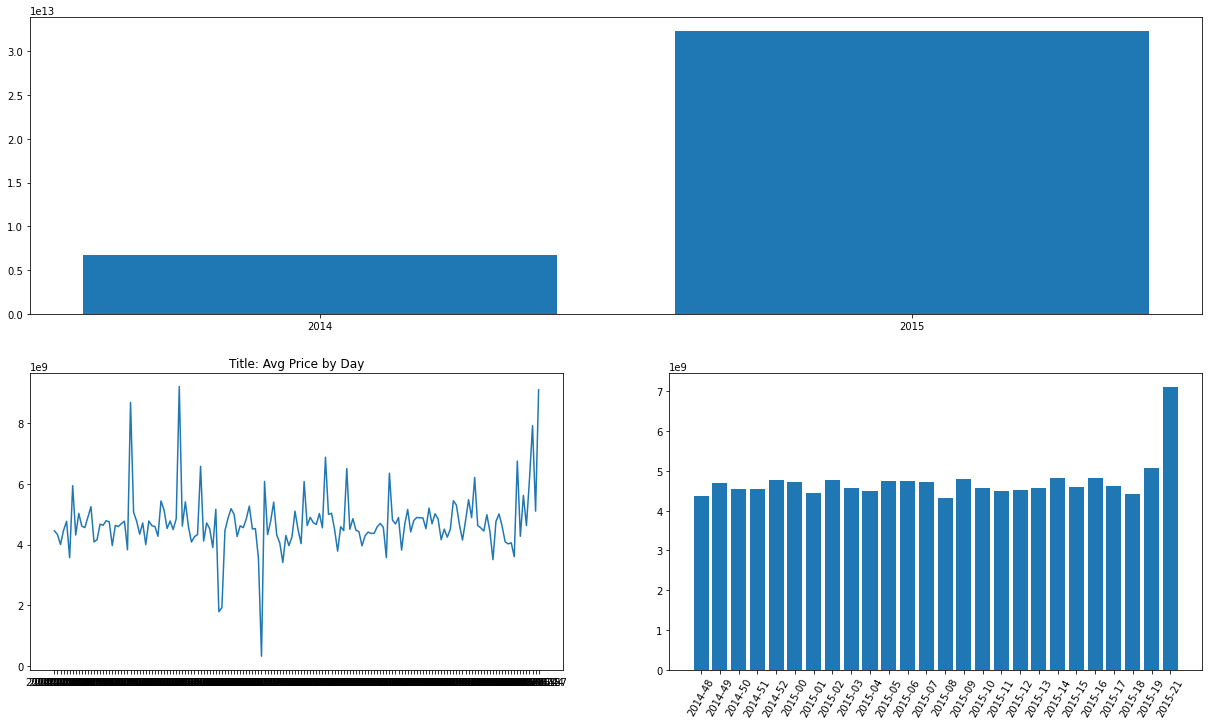

In [234]:
widgets.interactive(update_map, df=fixed(df), limit=date_limit)

## Exercício:

### 1. Qual a quantidade de imóveis por nível?
    Nivel 0: Preço entre R$ 0.00  e R$ 321.950
    Nivel 1: Preço entre R$ 321.950 e R$ 450.000
    Nivel 2: Preço entre R$ 450.000 e R$ 645.000
    Nivel 3: Preço entre R$ Acima de R$ 645.000

In [235]:

for i in range(len(df)):
    if (df.loc[i, 'price'] > 0) & (df.loc[i, 'price'] < 321950):
        df.loc[i, 'level'] = 'nivel_0'
    elif (df.loc[i, 'price'] > 321950) & (df.loc[i, 'price'] < 450000):  
        df.loc[i, 'level'] = 'nivel_1'
    elif (df.loc[i, 'price'] > 450000) & (df.loc[i, 'price'] < 645000):    
        df.loc[i,'level'] = 'nivel_2'
    else:
        df.loc[i, 'level'] = 'nivel_3'
        
        
print('O nível 0  têm {}'.format(df[df['level'] == 'nivel_0'].shape[0]))
print('O nível 1  têm {}'.format(df[df['level'] == 'nivel_1'].shape[0]))
print('O nível 2  têm {}'.format(df[df['level'] == 'nivel_2'].shape[0]))
print('O nível 3  têm {}'.format(df[df['level'] == 'nivel_3'].shape[0]))        

O nível 0  têm 5403
O nível 1  têm 5288
O nível 2  têm 5336
O nível 3  têm 5586


### 2. Qual a média do tamanho da sala de estar dos imíveis por "size"?
     Size 0: Tamanho entre 0 e 1427 sqft
     Size 1: Tamanho entre 1427 e 1910 sqft
     Size 2: Tamanho entre 1910 e 2550 sqft
     Size 3: Tamanho acima de 2550 sqtf

In [236]:
# df.loc[df[(df['price'] >= 0) & (df['price'] < 321950)], 'nivel'] = 'nivel_0'
size_0 = df[(df['sqft_living'] > 0) & (df['sqft_living'] < 1427)]
size_1 = df[(df['sqft_living'] >= 1427) & (df['sqft_living'] < 1910)]
size_2 = df[(df['sqft_living'] >= 1910) & (df['sqft_living'] < 2550)]
size_3 = df[df['sqft_living'] >= 2550]

print('A média do tamanha das salas de estar dos imóveis de size_0 é {}'.format(size_0.sqft_living.mean().round(2)))
print('A média do tamanho das salas de estar dos imóveis de Size_1 é {}'.format(size_1.sqft_living.mean().round(2)))
print('A média do tamanho das salas de estar dos imóveis de Size_2 é {}'.format(size_2.sqft_living.mean().round(2)))
print('A média do tamanho das salas de estar dos imóveis de Size_3 é {}'.format(size_3.sqft_living.mean().round(2)))

A média do tamanha das salas de estar dos imóveis de size_0 é 1123.78
A média do tamanho das salas de estar dos imóveis de Size_1 é 1661.2
A média do tamanho das salas de estar dos imóveis de Size_2 é 2202.7
A média do tamanho das salas de estar dos imóveis de Size_3 é 3318.99


### 3. Adicione as seguintes informações ao conjunto de dados original?
 - Place ID:Identificação da localização
 - OSM type: Open Street Map Type
 - Country: Nome do País
 - Country CODE: Código do País

In [55]:
dados = pd.read_csv('dados.csv')
dados.head()

Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  2014-10-13 221900.00         3       1.00   
1           1  6414100192  2014-12-09 538000.00         3       2.25   
2           2  5631500400  2015-02-25 180000.00         2       1.00   
3           3  2487200875  2014-12-09 604000.00         4       3.00   
4           4  1954400510  2015-02-18 510000.00         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  placeId  osm_type  \
0         1180      5650    1.00           0  ...       na       way   
1         2570      7242    2.00           0  ...       na       way   
2          770     10000    1.00           0  ...       na      node   
3         1960      5000    1.00           0  ...       na       way   
4         1680      8080    1.00           0  ...       na       way   

                       road  house_number     city       state       county  \
0         61st Avenue South         10012  Seattle  Washington  King County   
1    Northeast 127th Street           837  Seattle  Washington  King County   
2     81st Avenue Northeast         15109       na  Washington  King County   
3  Fauntleroy Way Southwest          9236  Seattle  Washington  King County   
4    221st Avenue Northeast           923       na  Washington  King County   

         country  country_CODE  neighbourhood  
0  United States            na  Rainier Beach  
1  United States            na             na  
2  United States            na             na  
3  United States            na             na  
4  United States            na             na  

[5 rows x 36 columns]

In [343]:

# make query
#query = str(df.loc[i, '47.59407025'])+ ',' + str(df.loc[i,'-122.29882395355685'])

# API Request 
response = geolocator.reverse('47.59407025,-122.29882395355685')

response.raw   

{'place_id': 146516219,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 228741162,
 'lat': '47.59407025',
 'lon': '-122.29882395355685',
 'display_name': '916, 26th Avenue South, Leschi, Seattle, King County, Washington, 98144, United States',
 'address': {'house_number': '916',
  'road': '26th Avenue South',
  'suburb': 'Leschi',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98144',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.594038', '47.5941405', '-122.2988845', '-122.298772']}

In [349]:
# # Create empty rows
# df['placeId']= 'na'
# df['osm_type'] = 'na'
# df['road'] = 'na'
# df['house_number'] = 'na'
# df['neighbourhood'] = 'na'
# df['city'] = 'na'
# df['state'] = 'na'
# df['county'] = 'na'
# df['country'] = 'na'
# df['country_CODE'] = 'na'


In [56]:

# geolocator = Nominatim(user_agent="geoapiAula_04")


# for i in range(len(df)):
#     print('Loop: {} / {}'.format(i, len(df)))
#     # make query
#     query = str(df.loc[i, 'lat'])+ ',' + str(df.loc[i,'long'])

#     # API Request 
#     response = geolocator.reverse(query)

#     # Populate df
#     if 'placeId' in response.raw :
#         df.loc[i, 'placeId'] = response.raw['place_id']
#     if 'osm_type' in response.raw :
#         df.loc[i, 'osm_type'] = response.raw['osm_type']
#     if 'road' in response.raw['address']:
#         df.loc[i, 'road'] = response.raw['address']['road']    
#     if 'house_number' in response.raw['address']:
#         df.loc[i, 'house_number'] = response.raw['address']['house_number']
#     if 'neighbourhood' in response.raw['address']:
#         df.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#     if 'city' in response.raw['address']:
#         df.loc[i, 'city'] = response.raw['address']['city']
#     if 'state' in response.raw['address']:
#         df.loc[i, 'state'] = response.raw['address']['state']    
#     if 'county' in response.raw['address']:
#         df.loc[i, 'county'] = response.raw['address']['county']
#     if 'country' in response.raw['address']:
#         df.loc[i, 'country'] = response.raw['address']['country']    
#     if 'country_CODE' in response.raw :
#             df1.loc[i, 'country_CODE'] = response.raw['country_code']    


## 4. Adicione os seguintes filtros no mapa:
 - Tamanho mínimo da área da sala de estar
 - Número mínino de banheiros
 - Valor máximo do preço
 - Tamanho máximo da área do porão
 - Filtro das condições do imóvel
 - Filtro por ano de construção

In [237]:
import ipywidgets as widgets

df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x ==1  else 'no')

df['level'] =df['price'].apply(lambda x: 0 if x < 321950 else
                                         1 if (x > 321950) & (x < 450000) else
                                         2 if (x > 450000) & (x < 645000) else 3 )


df['level'] = df['level'].astype(int)
style = {'description_width': 'initial'}


# min e max bathrooms
bathrooms_limit = widgets.IntSlider(
    value=5,
    min = 1,
    max = 8,
    step = 1,
    description='Maximum Size bathrooms',
    disable=False,
    style = style)


#Minimum of bedrooms
bedrooms_limit = widgets.IntSlider(
    value=10,
    min = 1,
    max = 33,
    step = 1,
    description='Number maximum of Bedrooms',
    disable=False,
    style = style)


# Iterative buttons - price 
price_limit = widgets.IntSlider(
    value = 540000,
    min = 75000,
    max = 77000000,
    step = 1,
    description='Maximum Price',
    disable=False,
    style = style)


# Maximum area of sqft_living
sqft_living_limit = widgets.IntSlider(
    value=5000,
    min = 290,
    max = 13540,
    step = 1,
    description='Maximum Size sqft_living',
    disable=False,
    style = style)


waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'yes',
    description='Water View',
    disable=False)

def update_map(df, waterfront, limit,sqft_living, bedrooms, bathrooms):
    houses = df[(df['price'] <= limit) &
               (df['is_waterfront'] == waterfront)][['id','lat','long','price','level','bedrooms','bathrooms',
                                                    'sqft_living']]
    
    fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       color='level',
                       size='price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':0})
    fig.show()  

In [238]:
widgets.interactive( update_map,df=fixed(df), waterfront=waterfront_bar, limit=price_limit,sqft_living=sqft_living_limit,bedrooms=bedrooms_limit, bathrooms=bathrooms_limit)

interactive(children=(Dropdown(description='Water View', index=1, options=('no', 'yes'), value='yes'), IntSlid…

## 5. Adicione os seguintes filtros no Dashboard:

 - Filtro por data disponível para compra
 - Filtro por ano de renovação
 - Filtro se possui vista para água ou não.

In [201]:
# df = pd.read_csv('datasets/kc_house_data.csv')

In [168]:
# #df.drop(df[df.score < 50].index, inplace=True)
# df.drop(df[df.yr_renovated == 0].index, inplace=True)

In [239]:
df['yr_renovated'].head()

0       0
1    1991
2       0
3       0
4       0
Name: yr_renovated, dtype: int64

In [244]:
df['yr_renovated'].sort_values().tolist()

AttributeError: 'list' object has no attribute 'head'

In [245]:
# change date format
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['year_week'] = pd.to_datetime(df['date']).dt.strftime('%Y-%U')

In [206]:
#df['new_date'] = pd.to_datetime(df['old_date'].astype(str), format='%Y%m%d')

#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'].astype(str),format='%Y')
# df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])


In [242]:
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])
df['yr_renovated'].max()

2015

In [243]:
df['yr_renovated'].min()

0

In [246]:
df['yr_renovated'].sort_values().unique().tolist()

[0,
 1934,
 1940,
 1944,
 1945,
 1946,
 1948,
 1950,
 1951,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1962,
 1963,
 1964,
 1965,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [247]:


df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x ==1  else 'no')


# widgets to control data
# widgets to control data
date_limit = widgets.SelectionSlider(
    options=df['date'].sort_values().unique().tolist(),
    value = '2014-05-02',
    description = 'Date ',
    continuous_update=False,
    orientation='horizontal',
    readout=True )

date_limit_renovated = widgets.SelectionSlider(
    options=df['yr_renovated'].sort_values().unique().tolist(),
    value = 1940,
    description = 'Renovated ',
    continuous_update=False,
    orientation='horizontal',
    readout=True )

waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'yes',
    description='Water View',
    disable=False)

# Iterative buttons - price 
price_limit = widgets.IntSlider(
    value = 540000,
    min = 75000,
    max = 77000000,
    step = 1,
    description='Maximum Price',
    disable=False,
    style = style)

def update_map(df, waterfront, limit, renovated, date):
    houses = df[(df['price'] <= limit) & (df['is_waterfront'] == waterfront)][['id','lat','long','price','level','yr_renovated','date','is_waterfront']]
    
    fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       color='level',
                       size='price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15,
                       zoom=10)
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600, margin={'r':0, 't':0,'l':0,'b':0})
    fig.show()  

In [248]:
df['price'].dtypes

dtype('float64')

In [249]:
widgets.interactive( update_map,df=fixed(df),date=date_limit, waterfront=waterfront_bar, limit=price_limit,renovated=date_limit_renovated)

interactive(children=(Dropdown(description='Water View', index=1, options=('no', 'yes'), value='yes'), IntSlid…